# VROA intensities of hydrogen peroxide

Here we show an example of how to calculate the VROA intensities of hydrogen peroxide calculated with an incident wavelength of 242.7 nm.

## Run the VROA code

First import any packages that we need. Mainly just need the VROA class from vibrav.

In [1]:
from vibrav.base import resource
from vibrav import VROA
import numpy as np

Initialize the class and print the elements in the configuration file

In [2]:
with open(resource('h2o2-vroa-va.conf'), 'r') as fn:
    print(fn.read())

DELTA_FILE                    h2o2-vroa-delta.dat.xz
SMATRIX_FILE                  h2o2-vroa-smatrix.dat.xz
ATOM_ORDER_FILE               h2o2-vroa-atom_order.dat.xz
REDUCED_MASS_FILE             h2o2-vroa-redmass.dat.xz
FREQUENCY_FILE                h2o2-vroa-freq.dat.xz
EQCOORD_FILE                  h2o2-vroa-eqcoord.dat.xz
ROA_FILE                      h2o2-vroa-roa.csv.xz
GRAD_FILE                     h2o2-vroa-grad.csv.xz
NUMBER_OF_MODES               6
NUMBER_OF_NUCLEI              4
USE_RESOURCE                  1



In [3]:
vroa = VROA(config_file=resource('h2o2-vroa-va.conf'))

Run the `vroa` method to calculate the intensities. Internally we read the ROA and gradient data from the lines in the configuration file corresponding to `roa_file` and `grad_file`. These have to be created prior to the run and are simple csv files generated by the python library, pandas.

For more information about how we parse the outputs you can refer to the tutorial on parsing the NWChem outputs using exatomic.

In [4]:
vroa.vroa()

Print the VROA intensities and other pertinent information

In [5]:
vroa.scatter

,freq,freqdx,beta_g*1e6,beta_A*1e6,alpha_g*1e6,backscatter,forwardscatter,exc_freq,exc_idx
0,342.372066,0,-474977.069418,-2639.805042,-46678.598862,-45.682272,-41.165987,242.7,0
1,857.146267,1,-12971.041317,-67.290251,1069.733854,-1.247373,0.563748,242.7,0
2,1242.310130,2,-5197.233435,601.900754,-0.014164,-0.479674,-0.092796,242.7,0
3,1371.356670,3,-164123.351953,3670.708147,-11271.522457,-15.638379,-10.800201,242.7,0
4,3591.200780,4,-87823.450986,2410.489336,54.565691,-8.353916,-1.404456,242.7,0
5,3591.928180,5,-42432.013816,2504.452192,5609.324487,-3.993331,3.319730,242.7,0


## Plot the calculated intensities

We use a full-width at half-maximum of 20 wavenumbers.

For this example we use 'atomic' units where the calculated VROA units are in $\unicode{xC5}^4/\text{amu}$

Set up the lineshape function

In [6]:
def lorentz(omega, omega_0, fwhm):
    return (1/np.pi) * 05.*fwhm / ((omega-omega_0)**2 + 0.25*fwhm**2)

In [7]:
x = np.linspace(0, 1800, 1000)
y = np.zeros(1000)
arr = zip(vroa.scatter['freq'], vroa.scatter['forwardscatter'])
for omega_0, inten in arr:
    y += lorentz(omega=x, omega_0=omega_0, fwhm=20)*inten

In [8]:
import matplotlib.pyplot as plt

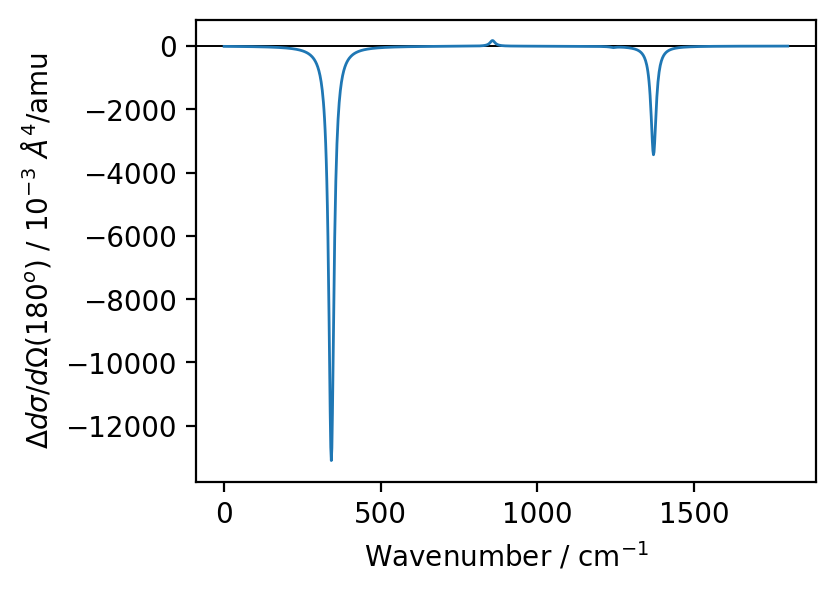

In [9]:
fig = plt.figure(figsize=(4,3), dpi=200)
ax = fig.add_subplot(111)
ax.axhline(0, color='k', linewidth=0.7)
ax.plot(x, 1e3*y, linewidth=1.0)
ax.set_xlabel('Wavenumber / cm$^{-1}$')
ax.set_ylabel(r"$\Delta d\sigma/d\Omega\left(180^{o}\right)$ / $10^{-3}~\AA^{4}$/amu")
plt.show()